In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
URL='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
dataset=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=URL,extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
train_dir=os.path.join(os.path.dirname(dataset),'cats_and_dogs_filtered/train')

In [0]:
validation_dir=os.path.join(os.path.dirname(dataset),'cats_and_dogs_filtered/validation')

In [0]:
train_eg=len(os.listdir(os.path.join(train_dir,'cats')))+len(os.listdir(os.path.join(train_dir,'dogs')))

In [0]:
validation_eg=len(os.listdir(os.path.join(validation_dir,'cats')))+len(os.listdir(os.path.join(validation_dir,'dogs')))

In [0]:
img_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.5,horizontal_flip=True)

In [0]:
img=img_gen.flow_from_directory(batch_size=100,directory=train_dir,target_size=(150,150),class_mode='binary')

Found 2000 images belonging to 2 classes.


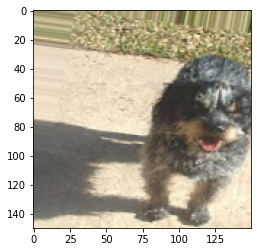

In [0]:
plt.imshow(img[0][0][1])

In [0]:
val_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
img_val=val_gen.flow_from_directory(batch_size=100,directory=validation_dir,target_size=(150,150),class_mode='binary')


Found 1000 images belonging to 2 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(2,activation=tf.nn.softmax)
])

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
h=model.fit(img,epochs=200,validation_data=img_val,steps_per_epoch=int(np.ceil(train_eg/float(100))),validation_steps=int(np.ceil(validation_eg/ float(100))))

Epoch 1/200
20/20 [==============================] - 20s 1s/step - loss: 0.3984 - accuracy: 0.8195 - val_loss: 0.4016 - val_accuracy: 0.8170
Epoch 2/200
 4/20 [=====>........................] - ETA: 10s - loss: 0.3488 - accuracy: 0.8725

KeyboardInterrupt: ignored

In [0]:
plt.plot(h.history['loss'],label='Training loss')
plt.plot(h.history['validation loss'],label='Validation loss')
plt.legend()

NameError: ignored

In [0]:
model.predict([img[0][0][0]])
plt.imshow(img[0][0][0])

ValueError: ignored